<a href="https://colab.research.google.com/github/OviedoMarco/INFERENCIA_ESTADISTICA/blob/main/PIA_INFERENCIA_ESTADISTICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> Estadistica Inferencial</h1>



<h2> Introducción: </h2> 
En la vida hay determinantes y preguntas que son necesarios saber para la toma de decisiones ya sea desde el ámbito académico hasta lo profesional, lo cual permite el desarrollo correcto de una empresa o el análisis de una población para tomar decisiones sobre eso.  

A través de la historia grandes matemáticos y físicos, crearon una ciencia que ayuda a determinar la muestra de población, márgenes de error, intervalos de confianza, entre muchos otros más; lo cual ha permitido que se determine la población de un país, aplicarse en la medicina a la hora de estudiar las enfermedades y hasta optimizar una empresa, mediante fórmulas matemáticas y modelos para realizar de manera ágil y rápida las diferentes operaciones planteadas, es por eso que este trabajo es de gran relevancia ya que se podrá obtener todo lo aprendido en este curso.  

En este proyecto exploraremos los aspectos básicos del análisis estadístico y el por qué es importante utilizarlo en materias como la ciencia de datos. Utilizaremos herramientas de programación como el lenguaje de R y Python para analizar los datos de venta de la comunidad residencial de lujo dentro de Walt Disney World Resort en Lake Buena Vista, Florida, llamado Golden Oak. Tomaremos en cuenta distintas variables como la ciudad, renta, el estado, garantía hipotecarían entre muchas otras variables más que se definirá en el desarrollo del proyecto. 


<h3> Referencias: </h3>

*    <a href="http://www.statisticshowto.com/"> Terminología estadística </a><br>
*   <a href="https://www.youtube.com/watch?v=TP6r5CTd9yM">Realización de Bootstrap no paramétrico para inferencia estadística usando R </a> por Ian Dworkin<br>
*   <a href="https://www.datacamp.com/tracks/data-visualization-with-r"> 
Visualización de datos con ggplot Parte 2 </a> por Rick Scavetta <br>



## Carga de Librerias y Base de datos

>Debido a que colab no cuenta con muchas librerias de r predeterminadas, tendremos que previamente instalarlas, para esto usaremos la funcion pacman para poder instalar todas las librerias requeridas y cargarlas al mismo tiempo

In [ ]:
# Esta función fue tomada del libro de estadistica con R
#Carga las librerias que se requieren para el analisis y si estas no estan previamente instaladas, las instala en el monitor
if (!require("pacman")) install.packages("pacman") 
pacman::p_load(tidyverse, skimr, GGally, plotly, viridis, caret, randomForest, e1071, rpart, 
               xgboost, h2o, corrplot, rpart.plot, corrgram, lightgbm, ggplot2, highcharter, 
               ggthemes, psych, scales, treemap, treemapify, repr, cowplot, magrittr, ggpubr,
               RColorBrewer, plotrix, ggrepel, tidyverse, gridExtra, reshape2, janitor)

lst <- c(
    "tidyverse", "skimr", "GGally", "plotly", "viridis", "caret", "randomForest", "e1071", "rpart", 
               "xgboost", "h2o", "corrplot", "rpart.plot", "corrgram", "lightgbm", "ggplot2", "highcharter", 
               "ggthemes", "psych", "scales", "treemap", "treemapify", "repr", "cowplot", "magrittr", "ggpubr",
               "RColorBrewer", "plotrix", "ggrepel", "tidyverse", "gridExtra", "reshape2", "janitor", "descr", "dplyr","boot","maps", "tidyquant",
    "wesanderson"
)

as_tibble(installed.packages())  %>% select(Package, Version)  %>% filter(Package %in% lst)

Loading required package: pacman



Package,Version
<chr>,<chr>
caret,6.0-90
corrgram,1.14
corrplot,0.90
cowplot,1.1.1
e1071,1.7-9
GGally,2.1.2
ggpubr,0.4.0
ggrepel,0.9.1
ggthemes,4.2.4


In [ ]:
df <- read.csv("/real_estate_db.csv")

head(df)

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,⋯,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
,<int>,<lgl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,220336,NA,140,16,2,Alaska,AK,Unalaska,Unalaska City,City,⋯,32.78177,31.91667,19.31875,440.4643,1894,0.25053,0.47388,0.30134,0.03443,0.09802
2,220342,NA,140,20,2,Alaska,AK,Eagle River,Anchorage,City,⋯,38.97956,39.66667,20.05513,466.6548,1947,0.94989,0.52381,0.01777,0.00782,0.13575
3,220343,NA,140,20,2,Alaska,AK,Jber,Anchorage,City,⋯,22.20427,23.16667,13.86575,887.6780,3570,0.00759,0.50459,0.06676,0.01000,0.01838
4,220345,NA,140,20,2,Alaska,AK,Anchorage,Point Mackenzie,City,⋯,37.00750,34.00000,22.06347,281.4942,1049,0.20247,0.44428,0.05933,0.00000,0.21563
5,220347,NA,140,20,2,Alaska,AK,Anchorage,Anchorage,City,⋯,34.96611,31.75000,20.49887,655.9807,2905,0.56936,0.51034,0.08315,0.06731,0.08711
6,220348,NA,140,20,2,Alaska,AK,Anchorage,Anchorage,City,⋯,33.63770,28.83333,20.63591,650.4535,2560,0.45011,0.39429,0.04615,0.02418,0.10242


## Estadisticos Basicos

In [ ]:
#Presentamos un resumen de cada columna, esta nos muestra las estadisticas basicas que podrian otorgarnos informacion
#Pero tenemos que tener cuidado pues algunos estadisticos puedes estar erroneos por los valores atipicos que suelen aparecer en las bases de datos
summary(df)

      UID         BLOCKID           SUMLEVEL      COUNTYID         STATEID     
 Min.   :220336   Mode:logical   Min.   :140   Min.   :  1.00   Min.   :1.000  
 1st Qu.:222824   NA's:5292      1st Qu.:140   1st Qu.: 21.00   1st Qu.:4.000  
 Median :225394                  Median :140   Median : 37.00   Median :6.000  
 Mean   :225387                  Mean   :140   Mean   : 48.47   Mean   :4.972  
 3rd Qu.:227963                  3rd Qu.:140   3rd Qu.: 71.00   3rd Qu.:6.000  
 Max.   :230479                  Max.   :140   Max.   :290.00   Max.   :6.000  
                                                                               
    state             state_ab             city              place          
 Length:5292        Length:5292        Length:5292        Length:5292       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                    

Separaremos las variables numericas de las categoricas para simplificar el analisis y poder tratar mejor los datos

In [ ]:
numerics <- select_if(df, is.numeric) #guardamos nuestras variables numericas en una nueva variable
colnames(numerics) #mostramos en pantalla las variables numericas

[1] "UID"                         "SUMLEVEL"                   
 [3] "COUNTYID"                    "STATEID"                    
 [5] "zip_code"                    "area_code"                  
 [7] "lat"                         "lng"                        
 [9] "ALand"                       "AWater"                     
[11] "pop"                         "male_pop"                   
[13] "female_pop"                  "rent_mean"                  
[15] "rent_median"                 "rent_stdev"                 
[17] "rent_sample_weight"          "rent_samples"               
[19] "rent_gt_10"                  "rent_gt_15"                 
[21] "rent_gt_20"                  "rent_gt_25"                 
[23] "rent_gt_30"                  "rent_gt_35"                 
[25] "rent_gt_40"                  "rent_gt_50"                 
[27] "universe_samples"            "used_samples"               
[29] "hi_mean"                     "hi_median"                  
[31] "hi_stdev"                    "hi_sample_weight"           
[33] "hi_samples"                  "family_mean"                
[35] "family_median"               "family_stdev"               
[37] "family_sample_weight"        "family_samples"             
[39] "hc_mortgage_mean"            "hc_mortgage_median"         
[41] "hc_mortgage_stdev"           "hc_mortgage_sample_weight"  
[43] "hc_mortgage_samples"         "hc_mean"                    
[45] "hc_median"                   "hc_stdev"                   
[47] "hc_samples"                  "hc_sample_weight"           
[49] "home_equity_second_mortgage" "second_mortgage"            
[51] "home_equity"                 "debt"                       
[53] "second_mortgage_cdf"         "home_equity_cdf"            
[55] "debt_cdf"                    "hs_degree"                  
[57] "hs_degree_male"              "hs_degree_female"           
[59] "male_age_mean"               "male_age_median"            
[61] "male_age_stdev"              "male_age_sample_weight"     
[63] "male_age_samples"            "female_age_mean"            
[65] "female_age_median"           "female_age_stdev"           
[67] "female_age_sample_weight"    "female_age_samples"         
[69] "pct_own"                     "married"                    
[71] "married_snp"                 "separated"                  
[73] "divorced"

<h4> Tipos de Distribucion </h4>

> Tomaremos variables de nuestra base de datos para poder explicar cada una de las distribuciones, podemos observar que contamos con los tres tipo de distribucuion principal (normal, sesgo hacia la derecha e izquierda)


<a id="mean_median"></a>
<ul> 
<li><b> Distribución normal: </b> También conocida como curva de campana, es una distribución en la que la mitad de los datos se encuentra en el lado izquierdo y la otra mitad se encuentra en el lado derecho de la distribución. En esta distribución, la curva es simétrica y la media, la moda y la mediana son todas iguales. </li>
<li><b>Distribución sesgada a la derecha: </b> tiene una cola larga que apunta a la <b> derecha </b>. Esto significa que en nuestra muestra o población, la mayoría de los datos se concentran en el lado izquierdo de la distribución. <b> La media de la renta </b> está en este caso sesgada a la derecha, lo que nos indica que la renta media se concentró principalmente en el lado izquierdo, lo que significa que la mayoría de las observaciones no pueden permitirse una renta alta.</li>
<li><b>Distribución sesgada a la izquierda: </b> tiene una cola larga que apunta a la <b> izquierda </b>. Esto significa que en nuestra muestra o población, la mayoría de los datos se concentran en el lado derecho de la distribución. <b>Deuda </b> es un ejemplo de una distribución sesgada a la izquierda, lo que significa que la mayoría de las observaciones tienen una alta concentración de deuda, lo que significa que la mayoría de las observaciones están en el lado derecho. </li>
</ul>

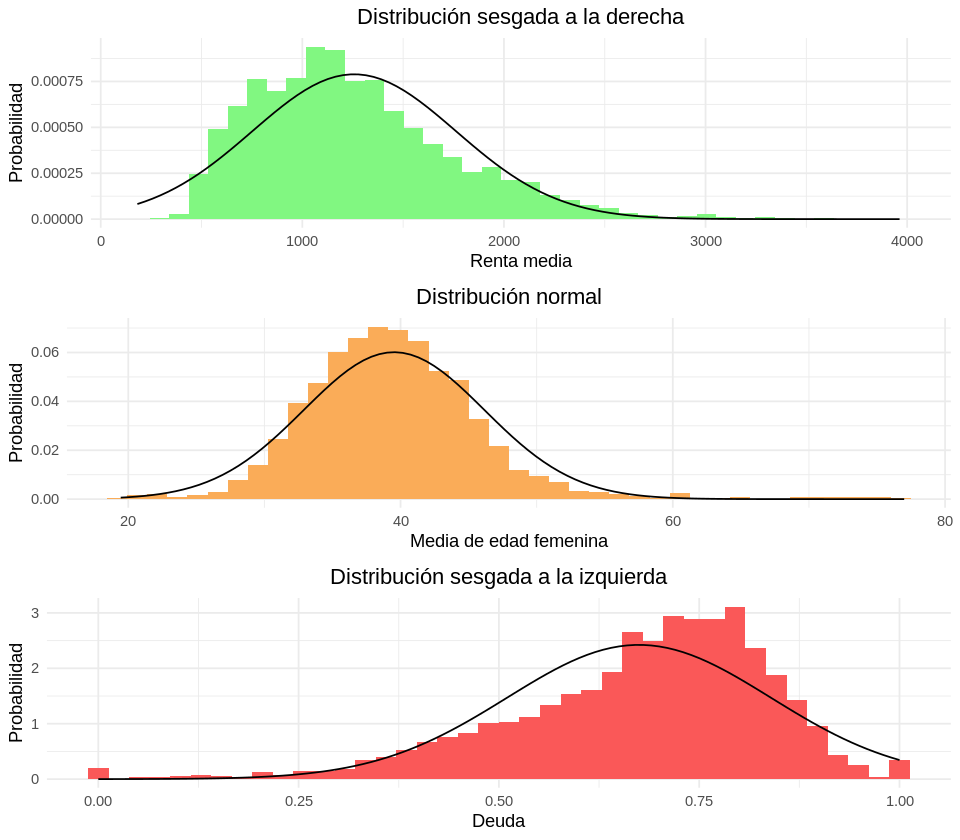

In [ ]:
# ¿Cuál es la distribución de la media familiar?

options(repr.plot.width=8, repr.plot.height=7)

# numerics %>% filter(!is.na(family_mean)) %>% 
#   summarize(mean=mean(family_mean), sd=sd(family_mean))

#mostramos la distribucion que tiene la variable Renta media
subset.rent <- numerics %>%
  filter(!is.na(rent_mean)) #eliminamos los valores nulos para poder mostrar la dsitribucion sin valores faltantes

p1 <- ggplot(data=subset.rent, aes(x=rent_mean))+ #graficamos nuestra distribucion
  geom_histogram(aes(y=..density..), bins = 40, fill="#81F781")+
  stat_function(fun=dnorm, color="black",
                args=list(mean=mean(subset.rent$rent_mean), 
                          sd=sd(subset.rent$rent_mean))) + theme_minimal() + 
theme(plot.title=element_text(hjust=0.5)) + labs(title="Distribución sesgada a la derecha", 
                                                x="Renta media", y="Probabilidad")

#mostramos la distribucion que tiene la variable edad media femenina

subset.female <- numerics %>%
  filter(!is.na(female_age_mean))


p2 <- ggplot(data=subset.female, aes(x=female_age_mean))+
  geom_histogram(aes(y=..density..), bins = 40, fill="#FAAC58")+
  stat_function(fun=dnorm, color="black",
                args=list(mean=mean(subset.female$female_age_mean), 
                          sd=sd(subset.female$female_age_mean))) + theme_minimal() + 
theme(plot.title=element_text(hjust=0.5)) + labs(title="Distribución normal", 
                                                x="Media de edad femenina", y="Probabilidad")

#mostramos la distribucion que tiene la variable deuda
subset.debt <- numerics %>%
  filter(!is.na(debt))


p3 <- ggplot(data=subset.debt, aes(x=debt))+
  geom_histogram(aes(y=..density..), bins = 40, fill="#FA5858")+
  stat_function(fun=dnorm, color="black",
                args=list(mean=mean(subset.debt$debt), 
                          sd=sd(subset.debt$debt))) + theme_minimal() + 
theme(plot.title=element_text(hjust=0.5)) + labs(title="Distribución sesgada a la izquierda", 
                                                x="Deuda", y="Probabilidad")

plot_grid(p1, p2, p3, align='h', nrow=3)

Mostramos breves estadisticos de las variables anteriormente mostradas para observar con mayor detalle 

In [ ]:
# Resumen estadístico de las variables previamente mostradas sin tomar en cuenta los valores faltantes de cada variable 
# Para poder evitar sesgos matematicos
cols <- numerics %>% select(debt, rent_mean, female_age_mean) %>% 
filter(!is.na(debt), !is.na(rent_mean), !is.na(female_age_mean))

do.call(cbind, lapply(cols, summary))

,debt,rent_mean,female_age_mean
Min.,0.0000000,181.7723,19.76781
1st Qu.,0.5860650,878.9692,35.40263
Median,0.7054000,1177.0329,39.13049
Mean,0.6749746,1257.1211,39.58056
3rd Qu.,0.7897550,1534.8831,43.02770
Max.,1.0000000,3962.3423,76.99683


mostramos un grafico similar al anterior para demostrar el sesgo de nuestras ditribuciones, sabemos que si la mediana se encuentra en el mismo lugar que la media, contamos con una distribucion normal

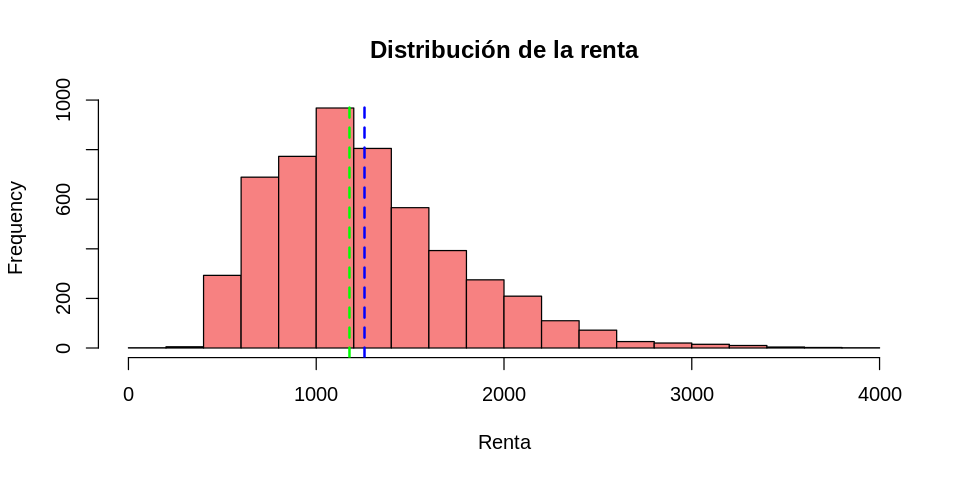

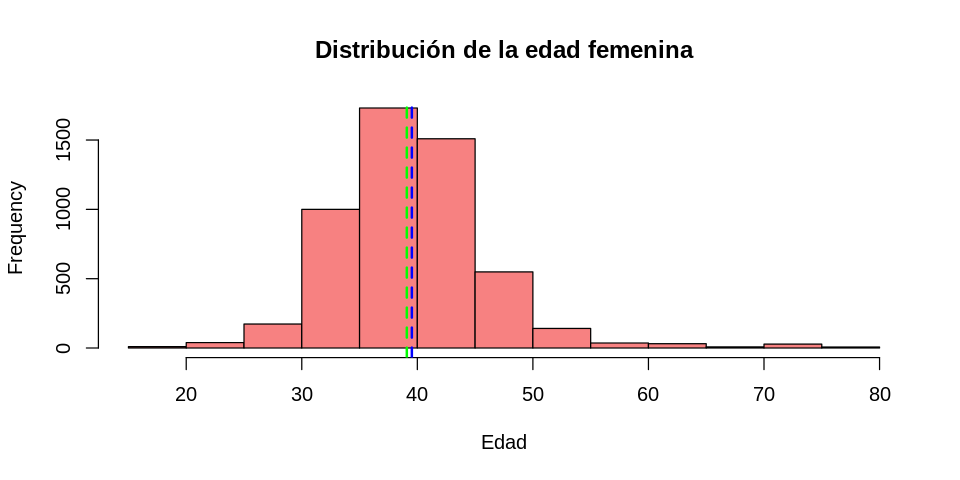

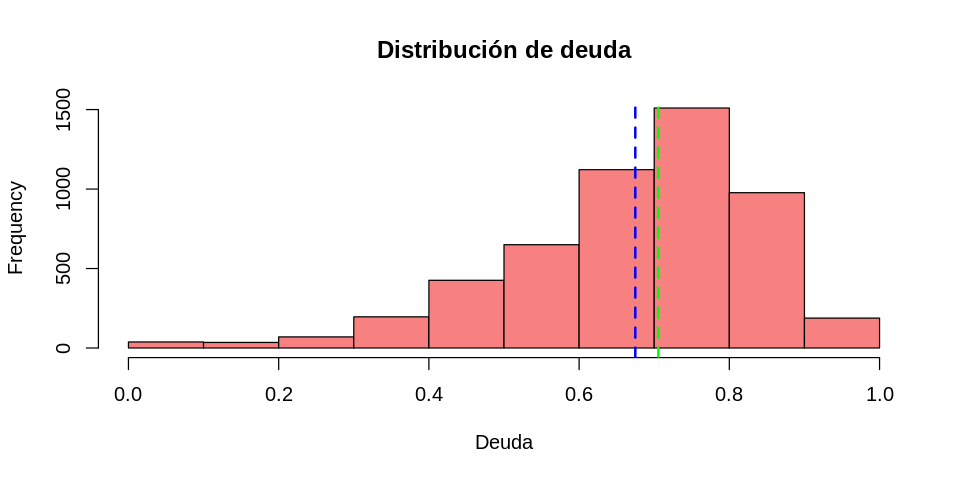

In [ ]:
options(repr.plot.width=8, repr.plot.height=4)
# windows(height = 7, width = 3.5)
# Líneas: la media es la línea azul y la mediana la línea verde

# Primer Subplot
p4 <- hist(subset.rent$rent_mean, col="#F78181", xlab="Renta", main="Distribución de la renta")
abline(v = mean(subset.rent$rent_mean), col = "blue", lwd = 2, lty="dashed")
abline(v = median(subset.rent$rent_mean), col = "green", lwd = 2, lty="dashed")
legend(x = c(4000, 3200), y = c(8000, 5500), legend=c("Media", "Mediana"), col=c("blue","green"), cex=0.7, 
      lty="dashed", lwd=1, y.intersp = 3.8, x.intersp=3.5, xjust=-1.8)


# Segundo Subplot
p5 <- hist(subset.female$female_age_mean, col="#F78181", xlab="Edad", main="Distribución de la edad femenina")
abline(v = mean(subset.female$female_age_mean), col = "blue", lwd = 2, lty="dashed")
abline(v = median(subset.female$female_age_mean), col = "green", lwd = 2, lty="dashed")
legend(x = c(78, 95), y = c(12000, 8000), legend=c("Media", "Mediana"), col=c("blue","green"), cex=0.7, 
      lty="dashed", lwd=1, y.intersp = 3.8, x.intersp=3.5, xjust=-1.8)

# Tercer Subplot
p6 <- hist(subset.debt$debt, col="#F78181", xlab="Deuda", main="Distribución de deuda")
abline(v = mean(subset.debt$debt), col = "blue", lwd = 2, lty="dashed")
abline(v = median(subset.debt$debt), col = "green", lwd = 2, lty="dashed")
legend(x = c(0.85, 1), y = c(5000, 3500), legend=c("Media", "Mediana"), col=c("blue","green"), cex=0.8, 
      lty="dashed", lwd=1, y.intersp = 2, x.intersp=0.7, xjust=0.5)

<h4> Otras medidas estadísticas: </h4>
<ul>
<li><b>Varianza: </b> Este es un indicador de cómo se distribuyen nuestros datos. La variabilidad más pequeña que podría haber es 0 mientras que la mayor es infinita. La varianza se expresa como: <br> $\sigma^2 = \frac{\sum\limits_{i=1}^N (X -\mu)^2}{N}$ </li><br>
<li><b>Desviación estándar: </b> La desviación estándar es solo la raíz cuadrada de nuestra varianza y nos dice qué tan lejos están nuestros datos de la media. La desviación estándar se expresa como: <br>
$s = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2}$</li><br>
<li><b>1er Cuartil(Q1)</b>: Esto está compuesto por el 25% más bajo de números en nuestra distribución.  </li>
<li><b>2do Cuartil (Q2)</b>: Compuesto por el 50% de los números más bajos hasta la <b> mediana.</b> </li>
<li><b>3rd Cuartil (Q3)</b>: Compuesto por el 75% de los números más bajos. </li>
<li><b> Rango intercuarti (IQR)</b>: Esto nos ayuda a detectar dónde se encuentran la mayoría de los datos. IQR se expresa como: <br>
IQR = $Q_1 - Q_3$  <br>
Se prefiere utilizar IQR en lugar de la media o la mediana cuando se trata de averiguar dónde se encuentran la mayoría de los datos..</li>

</ul>

Ahora haremos una tabla que nos muestre cuartiles y rango intercuartil de cada variable

In [ ]:
# Usaremos la población masculina ahora
stat_rent <- numerics %>% filter(!is.na(rent_mean)) %>%
  summarise(mu = mean(rent_mean), rent_med = median(rent_mean), 
            std = sd(rent_mean), 
            rent_min = min(rent_mean), rent_max = max(rent_mean),
            rent_q1 = quantile(rent_mean, 0.25),  # primer cuartil, percentil 25
            rent_q3 = quantile(rent_mean, 0.75), # tercer cuartil, percentil 75
           rent_iqr=rent_q3 - rent_q1)  # Rango intercuartil

stat_fage <- numerics %>% filter(!is.na(female_age_mean)) %>%
  summarise(mu = mean(female_age_mean), fage_med = median(female_age_mean), 
            std = sd(female_age_mean),
            fage_min = min(female_age_mean), fage_max = max(female_age_mean),
            fage_q1 = quantile(female_age_mean, 0.25),   # primer cuartil, percentil 25
            fage_q3 = quantile(female_age_mean, 0.75), # tercer cuartil, percentil 75
           fage_iqr=fage_q3 - fage_q1) # Rango intercuartil


stat_debt <- numerics %>% filter(!is.na(debt)) %>%
  summarise(mu = mean(debt), debt_med = median(debt), 
            std = sd(debt),
            debt_min = min(debt), debt_max = max(debt),
            debt_q1 = quantile(debt, 0.25),  # primer cuartil, percentil 25
            debt_q3 = quantile(debt, 0.75), # tercer cuartil, percentil 75
           debt_iqr=debt_q3 - debt_q1)  # Rango intercuartil

print("Estadísticas de renta media")
print("---------------------")
knitr::kable(stat_rent)
print("Estadísticas medias de edad femenina")
print("---------------------------")
knitr::kable(stat_fage)
print("Estadísticas de deuda")
print("---------------")
knitr::kable(stat_debt)

[1] "Estadísticas de renta media"
[1] "---------------------"




|       mu| rent_med|      std| rent_min| rent_max|  rent_q1|  rent_q3| rent_iqr|
|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|
| 1257.125| 1177.033| 505.5629| 181.7723| 3962.342| 879.2731| 1535.102| 655.8291|

[1] "Estadísticas medias de edad femenina"
[1] "---------------------------"




|       mu| fage_med|      std| fage_min| fage_max| fage_q1|  fage_q3| fage_iqr|
|--------:|--------:|--------:|--------:|--------:|-------:|--------:|--------:|
| 39.52573| 39.08989| 6.635169|  19.4442| 76.99683| 35.3303| 43.00736|  7.67706|

[1] "Estadísticas de deuda"
[1] "---------------"




|        mu| debt_med|       std| debt_min| debt_max|  debt_q1|  debt_q3| debt_iqr|
|---------:|--------:|---------:|--------:|--------:|--------:|--------:|--------:|
| 0.6748094|  0.70547| 0.1646559|        0|        1| 0.585815| 0.789845|  0.20403|

<h4> Diagramas de caja y presuntos valores atípicos: </h4>
<a id="boxplots"></a>



<h4> Unas palabras sobre valores atípicos: </h4>
Solo queriamos agregar en esta sección que los valores atípicos deben analizarse cuidadosamente y, aunque existen reglas comunes como la de una "distribución normal", cualquier valor más allá de tres desviaciones estándar debe considerarse un valor atípico. Aunque existe una pequeña probabilidad de que un valor en una distribución normal esté a 3 desviaciones estándar de la media, debemos analizar cuidadosamente por qué es así. Podría ser que los datos estuvieran mal escritos, lo que debilitaría la teoría de que una observación específica es un valor atípico.

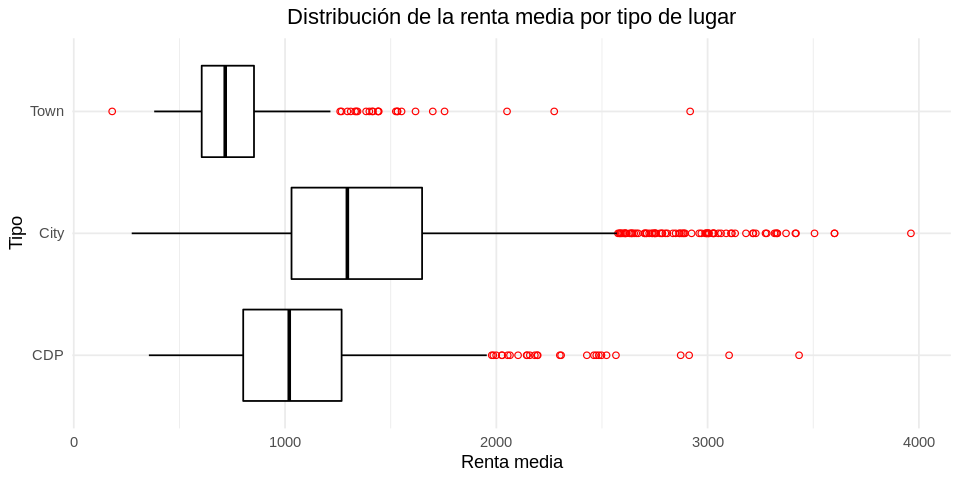

In [ ]:
# Usamos diagramas de caja para explicar mejor los conceptos de cuartiles

# # Usaremos tipo de lugar
t.place <- df %>% select(rent_mean, type) %>% 
filter(!is.na(rent_mean), !is.na(type)) %>%
ggplot(aes(x=type, y=rent_mean)) + geom_boxplot(fill="white", colour="black", 
                                                outlier.colour = "red", outlier.shape = 1) + 
theme_minimal() + theme(plot.title=element_text(hjust=0.5)) + coord_flip() + 
labs(title="Distribución de la renta media por tipo de lugar", x="Tipo", y="Renta media")

t.place + scale_fill_manual(values=c("#999999", "#E69F00"))

<h4> Entendiendo Q-Plots </h4>
<a id="qplots"></a>
<ul>
<li><b> Gráfica Q sesgada a la derecha: </b> Cuando la distribución está sesgada a la derecha, las observaciones tienden a ir por encima de la línea roja, lo que indica que la distribución está sesgada a la derecha.
<li><b>Qplot de distribución normal: </b> Aunque algunas observaciones no están en la línea, la mayoría de las observaciones están en la línea, lo que indica que la distribución es mayormente normal. </li>
<li><b>Gráfica Q sesgada a la izquierda: </b> Aunque esta distribución no está fuertemente sesgada a la izquierda, podemos ver que la mayoría de las observaciones caen por debajo de la línea roja, lo que indica que la distribución está sesgada a la izquierda. </li>
</ul>

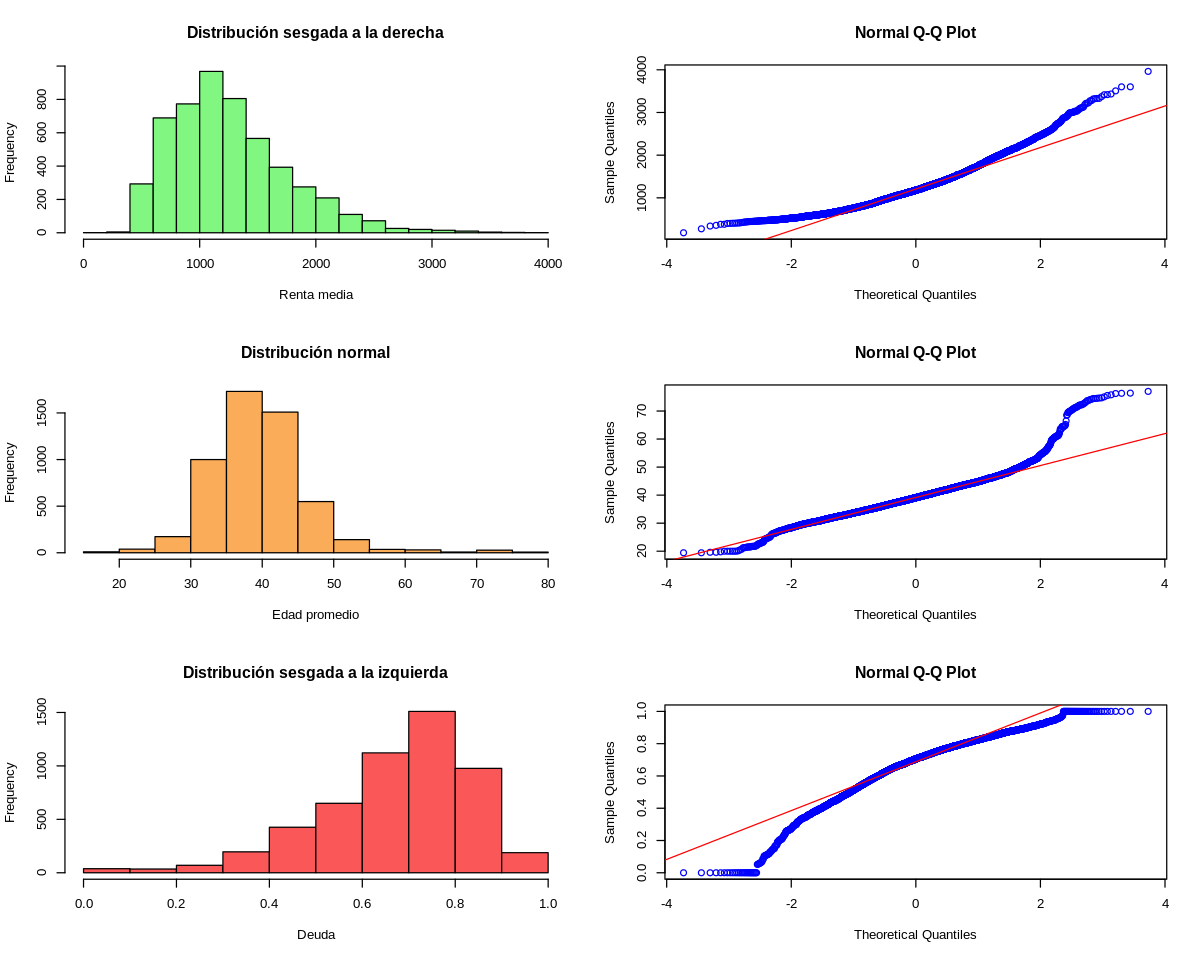

In [ ]:
# Sesgo a la derecha
options(repr.plot.width=10, repr.plot.height=8)
par(mfrow=c(3,2)) 
# Primera subplot (sesgada a la derecha)
hist(subset.rent$rent_mean, main="Distribución sesgada a la derecha", xlab="Renta media", col="#81F781")
qqnorm(subset.rent$rent_mean, col="blue")
qqline(subset.rent$rent_mean, col="red")

# Segundo subplot (Distribucion Normal)
hist(subset.female$female_age_mean, main="Distribución normal", xlab="Edad promedio", col="#FAAC58")
qqnorm(subset.female$female_age_mean, col="blue")
qqline(subset.female$female_age_mean, col="red")

# Tercera subplot
hist(subset.debt$debt, main="Distribución sesgada a la izquierda", xlab="Deuda", col="#FA5858")
qqnorm(subset.debt$debt, col="blue")
qqline(subset.debt$debt, col="red")

<h3> Usar logaritmos naturales para crear distribuciones normales: </h3> 
Aunque a veces el uso de logaritmos naturales no necesariamente impacta en las observaciones para formar una distribución normal (ejemplo sesgado a la izquierda), la mayoría de las veces nos da una distribución normal aproximada como en el ejemplo sesgado a la derecha.. <br>

<b>¿Por qué querríamos una distribución normal?</b><br>
Aunque hay muchas formas de lidiar con la asimetría, la mayoría de las técnicas estadísticas asumen que la distribución es "normal". Explicaremos con más detalle qué técnicas estadísticas son esas. Las pruebas estadísticas como las pruebas z, ty F suponen que la media tiene una distribución "normal". Además, es algo más sencillo calcular probabilidades y calcular intervalos de confianza asumiendo que la distribución cumple las condiciones del <b> Teorema del límite central (TLC) </b>. 


<b> Más sobre las condiciones del teorema del límite central: </b><br>
<a href="http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Probability/BS704_Probability12.html"> More on Central Limit Theorem </a>

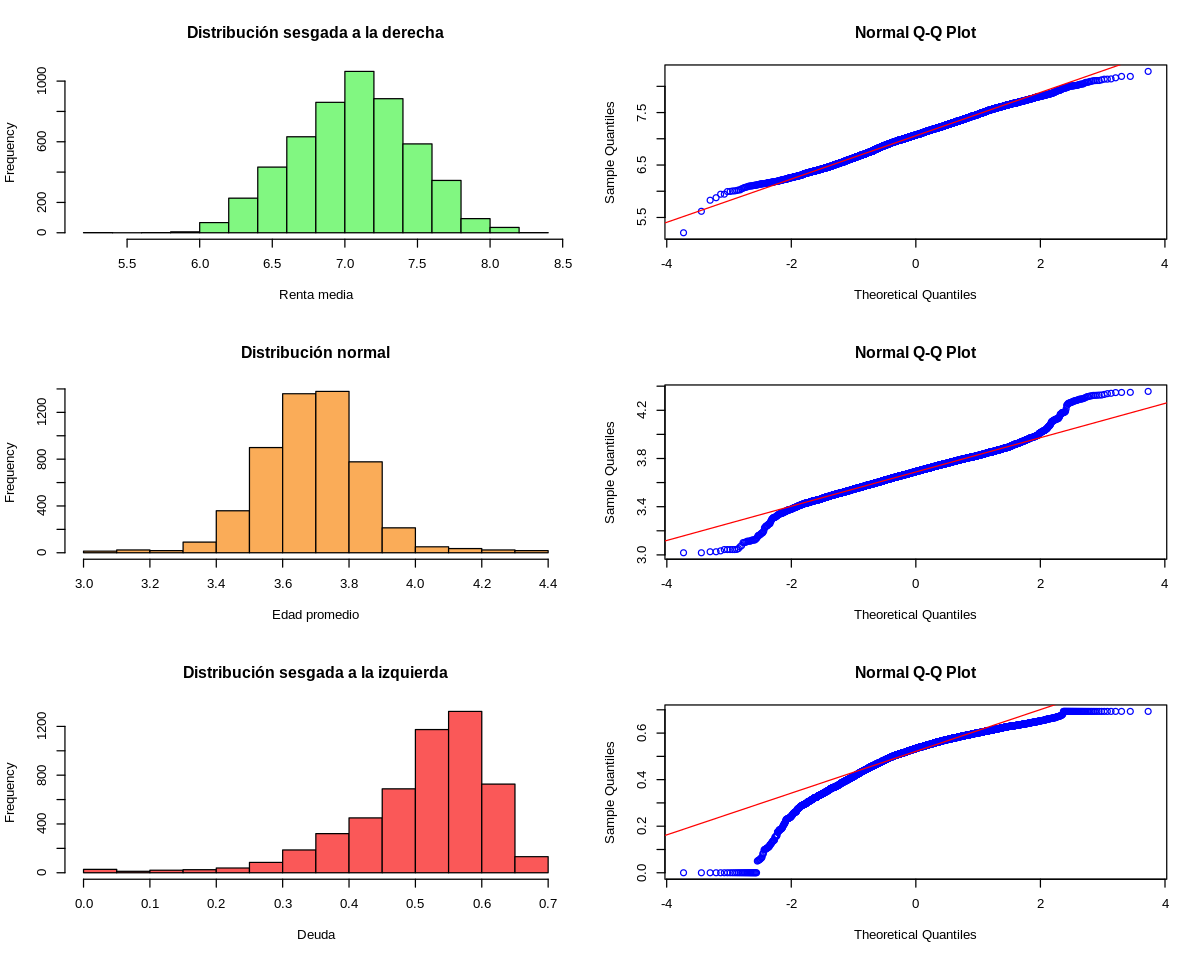

In [ ]:
# Sesgo a la derecha
options(repr.plot.width=10, repr.plot.height=8)
par(mfrow=c(3,2)) 
# Primera subplot (sesgada a la derecha)
hist(log1p(subset.rent$rent_mean), main="Distribución sesgada a la derecha", xlab="Renta media", col="#81F781")
qqnorm(log1p(subset.rent$rent_mean), col="blue")
qqline(log1p(subset.rent$rent_mean), col="red")

# Segundo subplot (Distribucion Normal)
hist(log1p(subset.female$female_age_mean), main="Distribución normal", xlab="Edad promedio", col="#FAAC58")
qqnorm(log1p(subset.female$female_age_mean), col="blue")
qqline(log1p(subset.female$female_age_mean), col="red")

# Tercer subplot
hist(log1p(subset.debt$debt), main="Distribución sesgada a la izquierda", xlab="Deuda", col="#FA5858")
qqnorm(log1p(subset.debt$debt), col="blue")
qqline(log1p(subset.debt$debt), col="red")

### Visualización de intervalos de confianza con ggplot:
Con los intervalos de confianza, nos aseguramos de nuestra confianza en cuál es el promedio real de la población. <b> Cuanto más anchas sean las barras de error, menos seguros de cuál es la media real. </b>

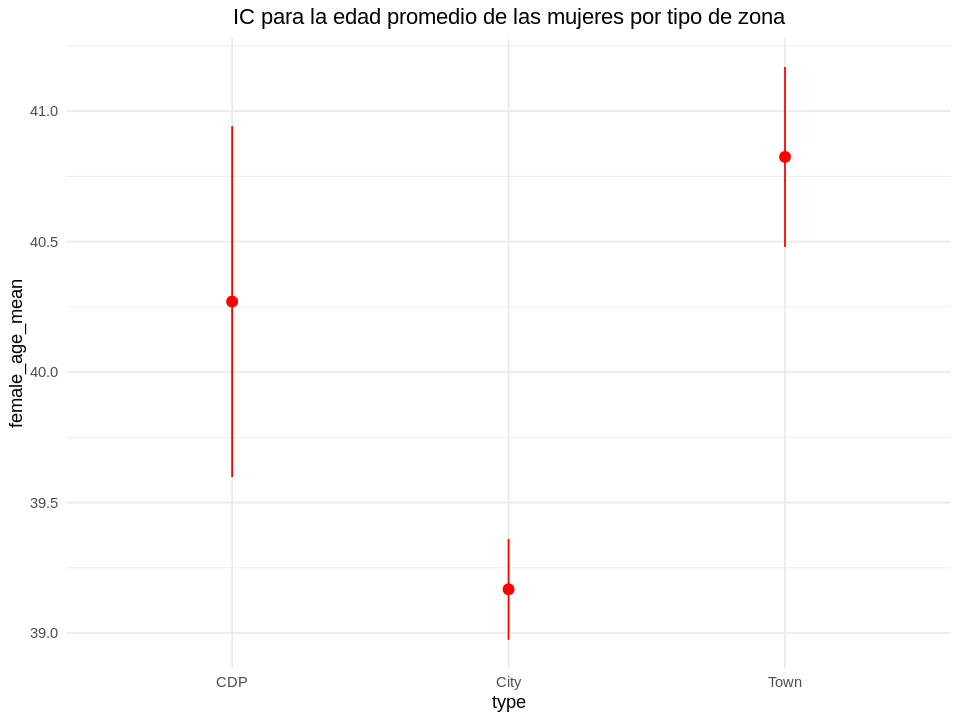

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)
subset.female <- df %>% filter(!is.na(female_age_mean))

ggplot(data=subset.female, aes(x=type, y=female_age_mean)) + stat_summary(fun.data=mean_cl_normal, color="red") + theme_minimal() + 
theme(plot.title=element_text(hjust=0.5)) + labs(title="IC para la edad promedio de las mujeres por tipo de zona")

In [ ]:
# Función para encontrar el rango femenino
age_range <- function(x) {
  # Cambie x a continuación para devolver los valores indicados
  data.frame(ymin = min(x), # Min
             ymax = max(x)) # Max
}

age_range(subset.female$female_age_mean)


# Encontrar el rango intercuartil
# Función a función personalizada
IQR <- function(x) {
  # Cambie x a continuación para devolver los valores indicados
  data.frame(median = median(x), # Mediana
             first_quartile = quantile(x, 0.25), # 1er cuartil
             third_quartile = quantile(x, 0.75),
            interquartile_range=(quantile(x, 0.75) - quantile(x, 0.25))) # 3er cuartil
}

IQR(subset.female$female_age_mean)

ymin,ymax
<dbl>,<dbl>
19.4442,76.99683


,median,first_quartile,third_quartile,interquartile_range
,<dbl>,<dbl>,<dbl>,<dbl>
25%,39.08988,35.3303,43.00736,7.67706


<h3> Estadísticas de inferencia: </h3>
<a id="hypothesis_testing"></a>
En esta sección hablaremos sobre la importancia de los intervalos de confianza y cómo podemos encontrar el intervalo de confianza de una distribución. Además, aplicaremos los temas de la prueba de hipótesis y explicaremos por qué es importante conocer estos conceptos antes incluso de intentar responder a la pregunta de nuestro problema principal.


<h4>Prueba de hipótesis (¿culpable o no culpable?) </h4>
Imagine un escenario en el que un individuo está en un juicio por cometer un asesinato en los Estados Unidos. Hasta donde sabemos, cuando un individuo es considerado <b> "inocente" </b> hasta que se demuestre lo contrario. A través de este breve ejemplo, me gustaría presentar el concepto de <b> Prueba de hipótesis </b>. Hay dos tipos de hipótesis: la <b> hipótesis nula </b> y la <b> hipótesis alternativa.</b><br>


<ul> 
<li> <b> Hipótesis nula ($ H_0 $): </b> Este es el "status quo", en nuestro ejemplo, el individuo que está en juicio es <b> inocente </b>. Cuando queremos comparar medias de dos variables, digamos el ingreso promedio de hombres y mujeres, la hipótesis Nula en este caso será que "no hay diferencia". </li>
<li> <b> Hipótesis alternativa ($ H_A $): </b> Esto va en contra de lo que afirmaba la Hipótesis nula. Una persona que fue a juicio es <b> culpable </b>. En nuestro ejemplo de ingresos promedio por género, el ingreso promedio de los hombres no es igual al ingreso promedio de las mujeres. </li>

</ul>

<b> Hipótesis nula (ejemplo de ingresos medios): </b><br>
$Aincome_M = Aincome_F$ <br><br>

<b> Hipótesis alternativa (ejemplo de ingreso promedio): </b><br>
$Aincome_M \ne Aincome_F$



<h4>Intervalos de confianza y valores p: </h4> 

<img src="https://www.researchgate.net/profile/Vladimir_Kekez/publication/271846185/figure/fig6/AS:295099222249473@1447368545063/Visual-interpretation-of-distribution-of-Significance-Level-p-values-and-z-score-in.png">
<b>Los intervalos de confianza (IC) </b> son la certeza de que un valor específico se ubicará entre dos puntos específicos. Los tipos de intervalos de confianza más habituales son los intervalos de conficencia del 90%, 95% y 99% aunque el 95% es el que más se utiliza y es el que usaremos en este ejemplo.<br>

<b> Valor p: </b> es la probabilidad de que ocurra un evento dado. Suponiendo que un intervalo de confianza es del 95%, si el valor p <$ \ alpha $, rechazamos la Hipótesis nula a favor de la Hipótesis alternativa. <br>

<b> Nivel de significancia: </b> es la probabilidad de rechazar la Hipótesis nula (también denotada como alfa o $\alpha$.

<b> Hallar el intervalo de confianza para la media poblacional: </b><br><br>

$\overline{x}\pm z^* s \frac{s}{\sqrt{N-1}}$<br>

$\overline{x}$ = Muestra promedio <br>
z = puntuación z <br>
s = Error estándar <br>
N = Tamaño de la muestra

Warning message:
“Removed 10 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


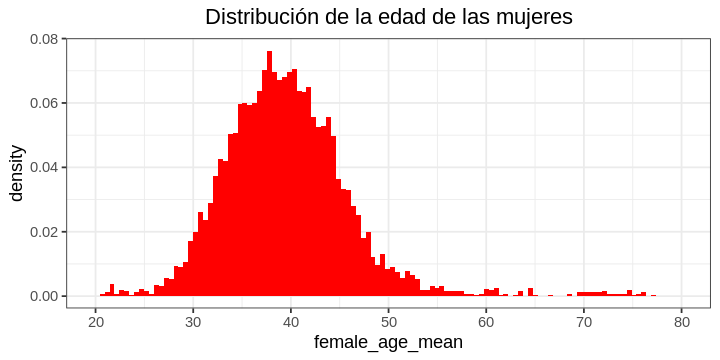

In [ ]:
# Calculemos el 95% del nivel de confianza de Male_Age_Mean (distribución normal)
# Corta el eje x
options(repr.plot.width=6, repr.plot.height=3)
# Primero veamos si Male_Age_Mean sigue una distribución normal uno de los criterios
f.age <- numerics %>% select(female_age_mean) %>% filter(!is.na(female_age_mean)) %>%
ggplot(aes(x=female_age_mean, y=..density..)) + geom_histogram(bins = 120, fill="red") + 
theme_bw() + scale_x_continuous(breaks = seq(20, 80, 10),
                               limits=c(20, 80)) + labs(title="Distribución de la edad de las mujeres") + 
theme(plot.title=element_text(hjust=0.5))

f.age

In [ ]:

# Tamaño de la muestra
n <- numerics %>% filter(!is.na(female_age_mean)) %>% nrow()
print(paste0("Número de filas después de filtrar valores nulos ", n))
# Desviación Estándar
std <- numerics %>% filter(!is.na(female_age_mean)) %>% summarise(std=sd(female_age_mean))
# Muestra promedio
x_bar <- numerics %>% filter(!is.na(female_age_mean)) %>% summarise(avg=mean(female_age_mean))

# error estándar 95% nivel de confianza
# Usamos un signo negativo para convertirlo en positivo
serror <- -qnorm(0.025)*std/sqrt(n)

lower_interval <- x_bar - serror
upper_interval <- x_bar + serror

print(paste0("El intervalo inferior es ", round(lower_interval,2), "  El intervalo superior es: ", round(upper_interval, 2)))


f.age <- numerics %>% filter(!is.na(female_age_mean))


[1] "Número de filas después de filtrar valores nulos 5262"
[1] "El intervalo inferior es 39.35  El intervalo superior es: 39.71"


<b> Entonces, ¿cómo interpretamos este nivel de confianza? </b><br>
<a id="confidence_intervals"></a>
El 95% de las muestras aleatorias de un tamaño de muestra de 38,728 (female_age_mean sin Nulls) de mujeres estadounidenses producirán intervalos de confianza que capturan la media de edad real de la población de mujeres. (40.2 - 40.32)

In [ ]:
# Función rep_sample_n agregada manualmente desde la biblioteca statsr
rep_sample_n <- function(tbl, size, replace = FALSE, reps = 1)
{
    n <- nrow(tbl)
    i <- unlist(replicate(reps, sample.int(n, size, replace = replace), simplify = FALSE))

    rep_tbl <- cbind(replicate = rep(1:reps,rep(size,reps)), tbl[i, , drop=FALSE])

    dplyr::group_by(rep_tbl, replicate)
}

# A medida que aumentamos el tamaño de la muestra, mayor es la precisión
n <- 50
ci_95 <- qnorm(0.975)


ci <- f.age %>%
  rep_sample_n(size = n, reps = 50, replace = TRUE) %>%
  summarise(lower = mean(female_age_mean) - ci_95 * (sd(female_age_mean) / sqrt(n)),
            upper = mean(female_age_mean) + ci_95 * (sd(female_age_mean) / sqrt(n)))

# Veamos cuántas veces es la media real entre los límites inferior y superior
f.avg <- f.age %>% summarise(avg=mean(female_age_mean))


ci <- ci %>%
  mutate(capturing_avg = ifelse(lower < f.avg$avg & upper > f.avg$avg, "Entre", "Fuera de los límites"))

score <- length(which(ci$capturing_avg == "Entre")) / nrow(ci) * 100


print(paste0("El porcentaje en el que el promedio real es 'intermedio':", score, "%"))

[1] "El porcentaje en el que el promedio real es 'intermedio':90%"


In [ ]:
# Necesitamos la media, la desviación estándar, la media de la muestra, el tamaño de la muestra
# Para hacer la media muestral y la desviación estándar, obtenga la información de la misma muestra.
set.seed(42)
mu <- mean(f.age$female_age_mean)
n <- 50 # Tamaño de la muestra
x_bar <- mean(sample(f.age$female_age_mean, 50))
std_bar <- sd(sample(f.age$female_age_mean, 50))
standard_error <- qnorm(0.025)*std_bar/sqrt(n) # 95% de nivel de confianza

# La puntuación Z
z_score <- (x_bar - mu)/standard_error

print(paste0("Z_score es: ", round(z_score, 2)))

z <- (3.2 - 3) / 0.246

# valor p para dos lados
p_val <- 2*pnorm(-abs(z_score))
print(paste0("El valor p de dos colas es:  ", round(p_val,2)))

# valor p para un lado
ones_pval <- p_val / 2
print(paste0("El valor p unilateral es:  ", round(ones_pval,2)))

[1] "Z_score es: -0.24"
[1] "El valor p de dos colas es:  0.81"
[1] "El valor p unilateral es:  0.41"


<a id="p_val"></a>
<b> En este caso, dado que el p-valor > $\alpha$ no rechazamos $H_0$</b>

<h4> Distribución T </h4>
<a id="t_distribution"></a>
<img src="https://i2.wp.com/www.real-statistics.com/wp-content/uploads/2012/11/t-distribution-chart.png?resize=439%2C264">

La distribución t es una distribución que solo se usa para muestras pequeñas. La primera pregunta que tuvimos al tratar con este tipo de distribución es por qué necesitamos una distribución t cuando recibimos toneladas diarias de datos, lo que hace imposible tener una muestra pequeña. Bueno, las distribuciones t se usan con más frecuencia cuando <b> se realiza un experimento </b> que suele tener muestras más pequeñas. <br><br>

<b>Distribución t: </b>
<ul>
    <li><b>Tamaño de la muestra: </b> El tamaño de la muestra debe ser menor que 30 para ser considerado para una distribución t. </li>
    <li><b>Grados de libertad:</b> A medida que el tamaño de la muestra se acerca a 30, la distribución t se verá exactamente como una distribución normal. Además, los grados de libertad determinan el grosor de la cola. </li>
    <li><b>Puntuación T: </b> Para calcular la puntuación t usamos la siguiente fórmula, $(\overline{x} - Null) / s$ donde s es el error estándar y nula la hipótesis nula.</li>
    
</ul>




### <b> Intervalo de confianza del 95% de una muestra para alquiler en el estado de Nueva York.</b>

In [ ]:
# Haciendo inferencia con la distribución t Curso 2 Semana 3



two_states <- df %>% select(state, rent_mean) %>% filter(state == "California"| state == "New York") %>%
filter(!is.na(rent_mean))

# En una muestra de grados de libertad es (n - 1)
set.seed(42)
sample_twostates <- sample_n(two_states, 22)

# Encontrar el puntaje t crítico (siempre usamos un puntaje crítico positivo).
# qt (0.025, gl = 23)


# Calculemos el promedio de alquiler para el estado de Nueva York usando un nivel de confianza del 95%
ny_samp <- sample_twostates %>% filter(state == "New York")

# tamaño de la muestra
n <- ny_samp %>% nrow()
# Muestra promedio
x_bar <- ny_samp %>% summarise(avg=mean(rent_mean))
# puntuación t (gl = n - 1)
t_score <- abs(qt(0.025, df=11))

std_ny <- ny_samp %>% summarise(std=sd(rent_mean))

# Encuentre el intervalo de confianza del 95%
upper_bound <- x_bar + t_score * (std_ny / sqrt(n))
lower_bound <- x_bar - t_score * (std_ny / sqrt(n))

# Tenemos un 95% de confianza en que la renta media de la ciudad de nueva york se encuentra entre 934-1417

### El alquiler promedio en Nueva York es algo diferente a 1000.

<b> Supongamos que Mu = 1000 para el alquiler de Nueva York, encontremos el valor p para ver si hay suficiente evidencia de que podríamos rechazar $ H_0 $ a favor de $ H_A $, recuerde si el valor p es menor que 0.05 nivel de significancia luego rechazamos el Nulo a favor de la alternativa. </b>

In [ ]:
# Busquemos el valor p, supongamos que el nulo es que el Mu = 1000
standard_error <- std_ny / sqrt(n)


# Busquemos la puntuación t
mu <- 1000
t_score <- (x_bar -  mu) / standard_error



# Tenemos una puntuación t de 1,605
# grados de libertad = 11

# Busquemos el valor p
# Necesitamos las dos colas
2 * pt(1.605, df=11, lower.tail=FALSE)

[1] 0.1367962

Dado que nuestro valor p es mayor que 0.05, nos inclinamos a favor de la <b> Hipótesis nula </b>, lo que significa que no hay evidencia suficiente de que el alquiler promedio en Nueva York sea algo diferente a 1000.